Loading the test dataset

In [1]:
import pandas as pd
tweets_df = pd.read_csv("test.csv", encoding='ANSI')
tweets_df = tweets_df.loc[0:3533]
tweets_df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554.0,120340.0,55.0
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644.0,1266700.0,19.0
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589.0,910770.0,226.0
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816.0,120410.0,214.0


In [2]:
tweets_df.dtypes

textID               object
text                 object
sentiment            object
Time of Tweet        object
Age of User          object
Country              object
Population -2020    float64
Land Area (Km²)     float64
Density (P/Km²)     float64
dtype: object

In [3]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3534 entries, 0 to 3533
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 248.6+ KB


In [4]:
tweets_df.isnull().sum()

textID              0
text                0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [6]:
text_id_count = tweets_df['textID'].nunique()
text_id_count

3534

In [7]:
Sentiment_counts = tweets_df['sentiment'].value_counts()
Sentiment_counts

sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64

In [8]:
tweet_time_counts = tweets_df['Time of Tweet'].value_counts()
tweet_time_counts

Time of Tweet
morning    1178
noon       1178
night      1178
Name: count, dtype: int64

In [9]:
grouped_by_country = tweets_df.groupby('Country')
tweets_per_country = grouped_by_country['textID'].count()
print("Tweets per Country", tweets_per_country)

Tweets per Country Country
Afghanistan    20
Albania        20
Algeria        20
Andorra        20
Angola         20
               ..
Venezuela      17
Vietnam        17
Yemen          17
Zambia         17
Zimbabwe       17
Name: textID, Length: 195, dtype: int64


In [10]:
grouped_by_userage = tweets_df.groupby('Age of User')
tweets_per_userage = grouped_by_userage['textID'].count()
print("Tweets per User Age", tweets_per_userage)

Tweets per User Age Age of User
0-20      590
21-30     590
31-45     590
46-60     588
60-70     588
70-100    588
Name: textID, dtype: int64


In [11]:
top20_tweets_per_country = tweets_df['Country'].value_counts().nlargest(20)
top20_tweets_per_country

Country
Afghanistan                         20
Ecuador                             20
China                               20
Colombia                            20
Comoros                             20
Congo (Congo-Brazzaville)           20
Costa Rica                          20
Croatia                             20
Cuba                                20
Cyprus                              20
Czechia (Czech Republic)            20
Democratic Republic of the Congo    20
Denmark                             20
Djibouti                            20
Albania                             20
Dominican Republic                  20
Egypt                               20
Chad                                20
El Salvador                         20
Equatorial Guinea                   20
Name: count, dtype: int64

In [12]:
top20_tweets_per_country_df = pd.DataFrame(top20_tweets_per_country)
top20_tweets_per_country_df

,count
Country,
Afghanistan,20
Ecuador,20
China,20
Colombia,20
Comoros,20
Congo (Congo-Brazzaville),20
Costa Rica,20
Croatia,20
Cuba,20


EXPLORATORY DATA ANALYSIS

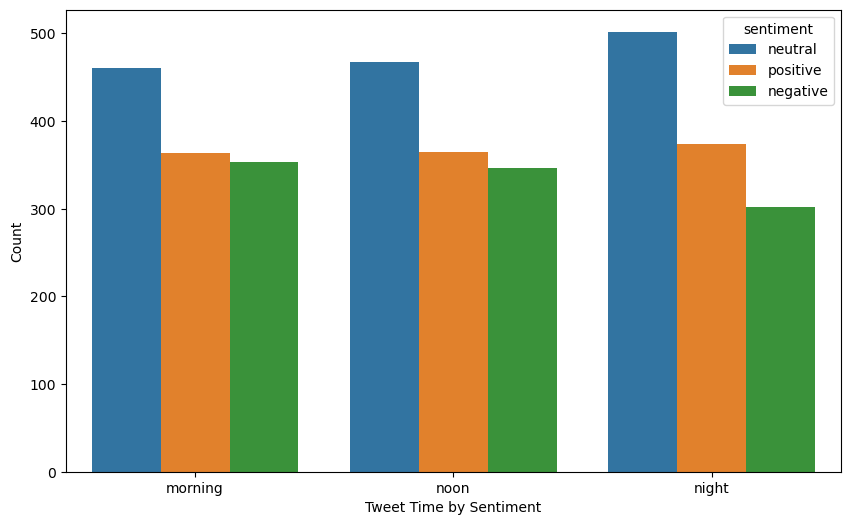

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='Time of Tweet', hue='sentiment', data=tweets_df)
plt.xlabel('Tweet Time by Sentiment')
plt.ylabel('Count')
plt.show()

Insights:

We can infer that there are same number of tweets in all parts of day, and there are more neutral tweets than negative tweets.

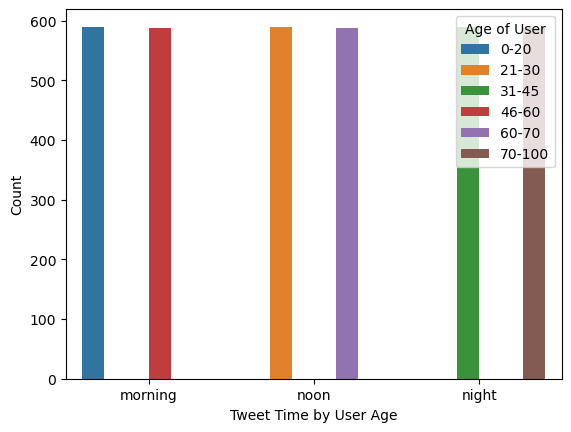

In [14]:
sns.countplot(x='Time of Tweet', hue='Age of User', data=tweets_df)
plt.xlabel('Tweet Time by User Age')
plt.ylabel('Count')
plt.show()

Insights:

Users falling in age groups 0-20 and 46 - 60 post from morning, users from 21 - 30 and 60 - 70 post in the noon and users from 31 - 45 and 70 - 100 post in the night

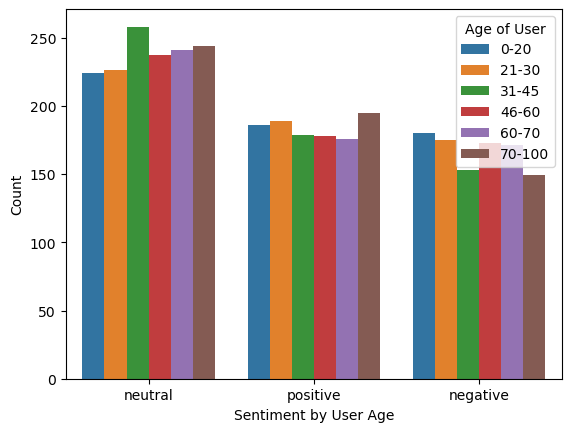

In [15]:
sns.countplot(x='sentiment', hue='Age of User', data=tweets_df)
plt.xlabel('Sentiment by User Age')
plt.ylabel('Count')
plt.show()

Insights:

1. There are higher number of users posting neutral tweets aged between 31 to 45 and the lowest from 0 to 20.
2. There are higher number of users posting positive tweets aged between 70 to 100 and the lowest from 60 to 70.
3. There are higher number of users posting negative tweets aged between 0 to 20 and the lowest from 70 to 100.


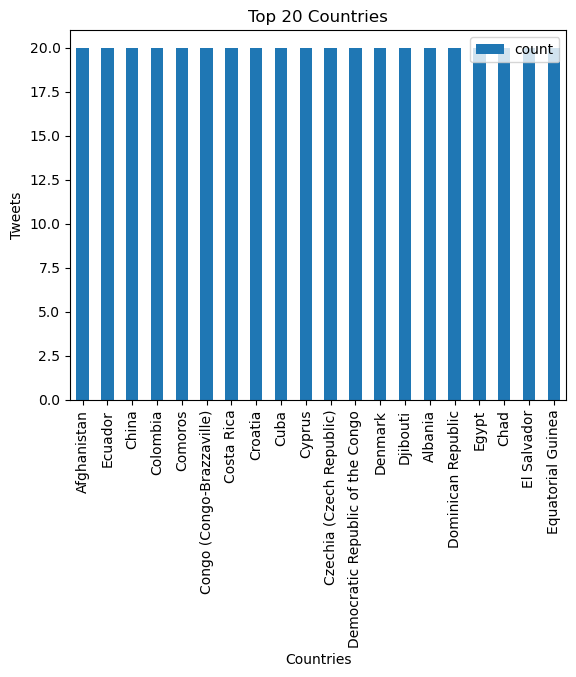

In [16]:
top20_tweets_per_country_df.plot(kind = 'bar')
plt.title('Top 20 Countries')
plt.xlabel('Countries')
plt.ylabel('Tweets')
plt.show()


Loading the train dataset

In [17]:
train_data = pd.read_csv("train.csv", encoding='ANSI')
train_data

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [18]:
print(train_data.shape)
print(tweets_df.shape)

(27481, 10)
(3534, 9)


In [19]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [20]:
train_data.isnull().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [21]:
mode_text = train_data['text'].mode()[0]
train_data.fillna({'text': mode_text}, inplace = True)
train_data

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [22]:
train_data.isnull().sum()

textID              0
text                0
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [23]:
mode_selected_text = train_data['selected_text'].mode()[0]
train_data.fillna({'selected_text': mode_selected_text}, inplace = True)
train_data

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [24]:
train_data.isnull().sum()

textID              0
text                0
selected_text       0
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

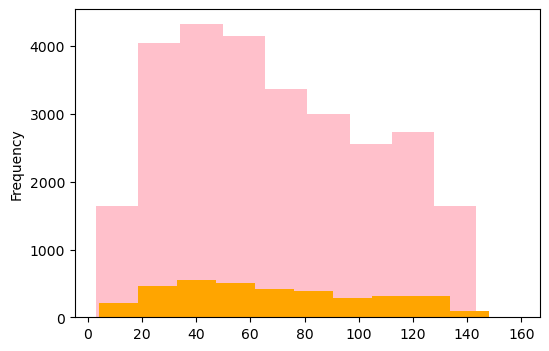

In [25]:

# checking the distribution of tweets in the data

length_train = train_data['text'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = tweets_df['text'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [26]:
# adding a column to represent the length of the tweet

train_data['len'] = train_data['text'].str.len()
tweets_df['len'] = tweets_df['text'].str.len()
tweets_df

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),len
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,49
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,103
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,78
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,12
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,39
...,...,...,...,...,...,...,...,...,...,...
3529,e5f0e6ef4b,"its at 3 am, im very tired but i can`t sleep ...",negative,noon,21-30,Nicaragua,6624554.0,120340.0,55.0,58
3530,416863ce47,All alone in this old house again. Thanks for...,positive,night,31-45,Niger,24206644.0,1266700.0,19.0,138
3531,6332da480c,I know what you mean. My little dog is sinkin...,negative,morning,46-60,Nigeria,206139589.0,910770.0,226.0,102
3532,df1baec676,_sutra what is your next youtube video gonna b...,positive,noon,60-70,North Korea,25778816.0,120410.0,214.0,74


In [27]:
train_data

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),len
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60,36
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105,46
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18,25
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164,31
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26,75
...,...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137,77
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81,122
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331,111
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167,27


Most Frequently occuring words

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

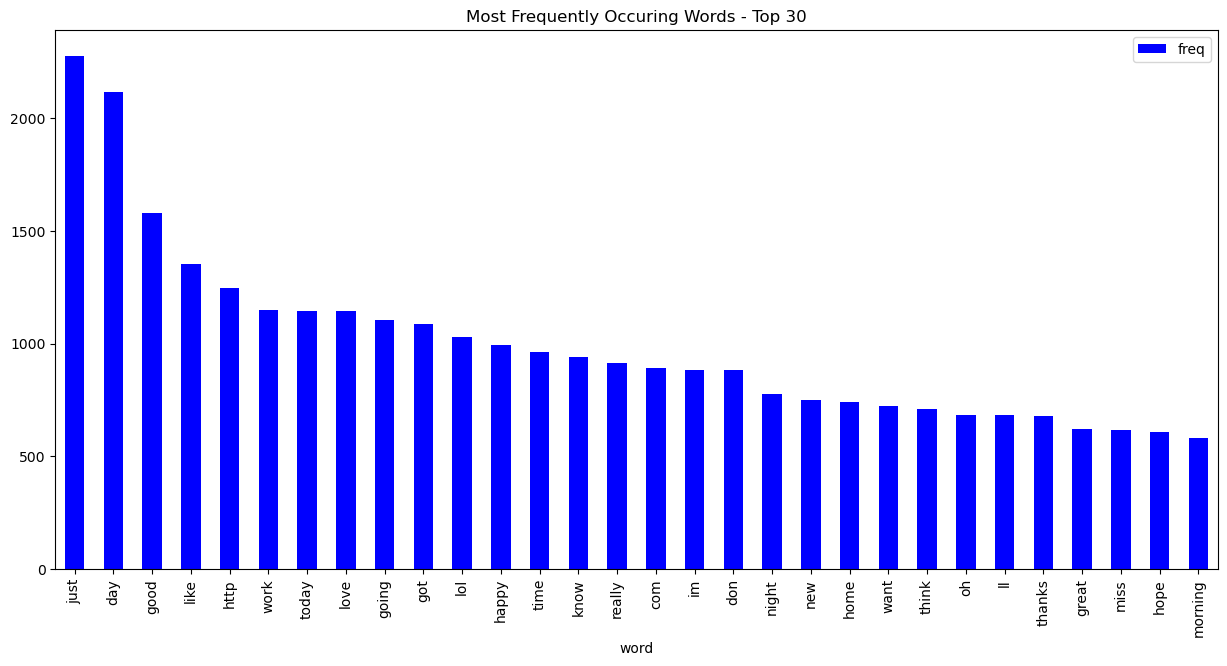

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_data.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Working with Wordcloud

In [36]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

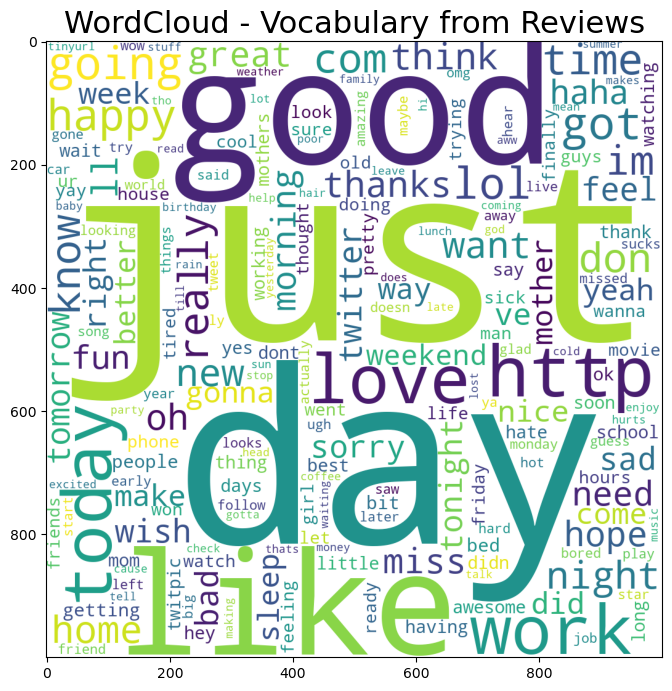

In [29]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

Highlight the Normal Words

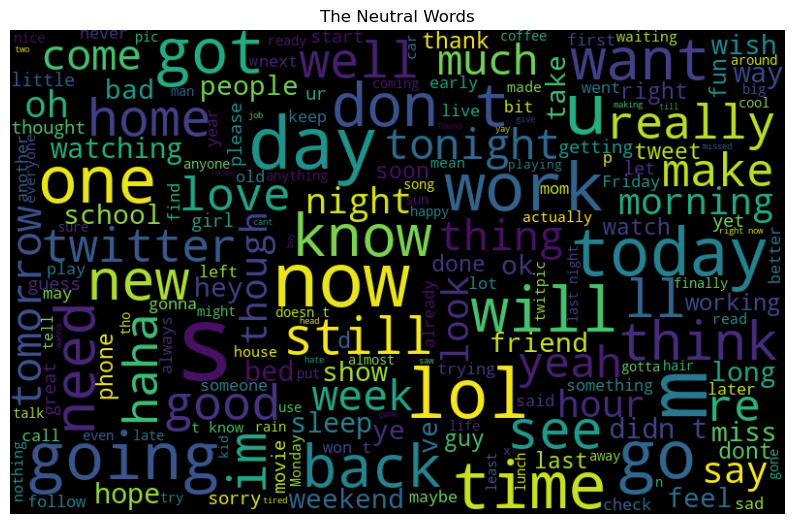

In [30]:
normal_words =' '.join([text for text in train_data['selected_text'][train_data['sentiment'] == 'neutral']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

Highlight the Negative Words

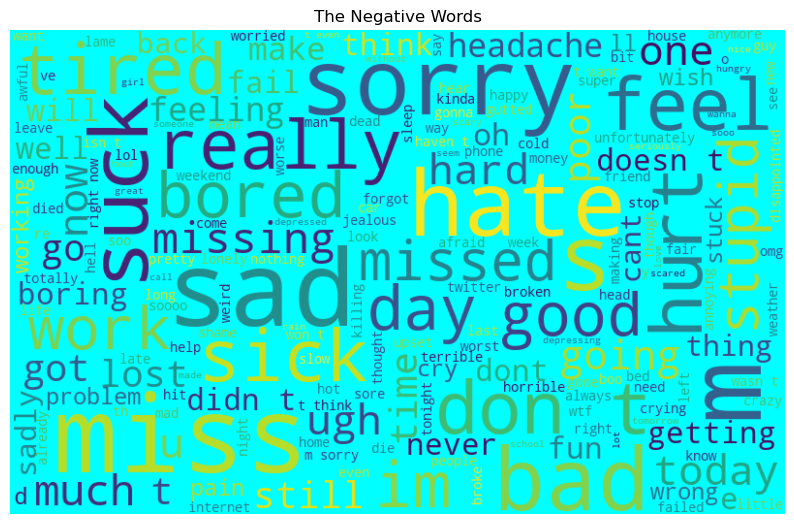

In [31]:
negative_words =' '.join([text for text in train_data['selected_text'][train_data['sentiment'] == 'negative']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [32]:
# collecting the hashtags
import re
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [33]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train_data['selected_text'][train_data['sentiment'] == 'positive'])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train_data['selected_text'][train_data['sentiment'] == 'negative'])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])
     

Installing nltk

In [47]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


Plotting regular hashtags

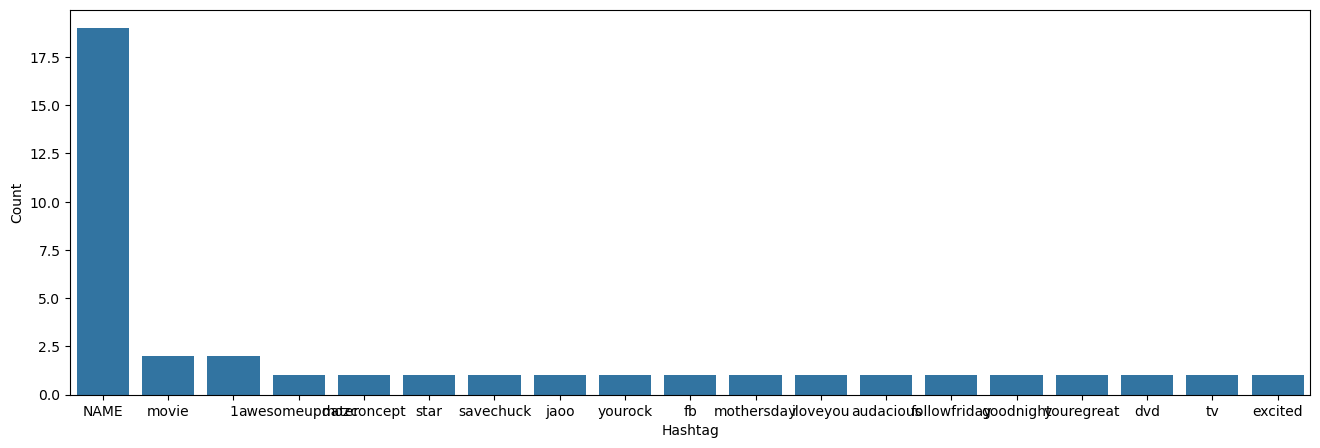

In [34]:
import nltk
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

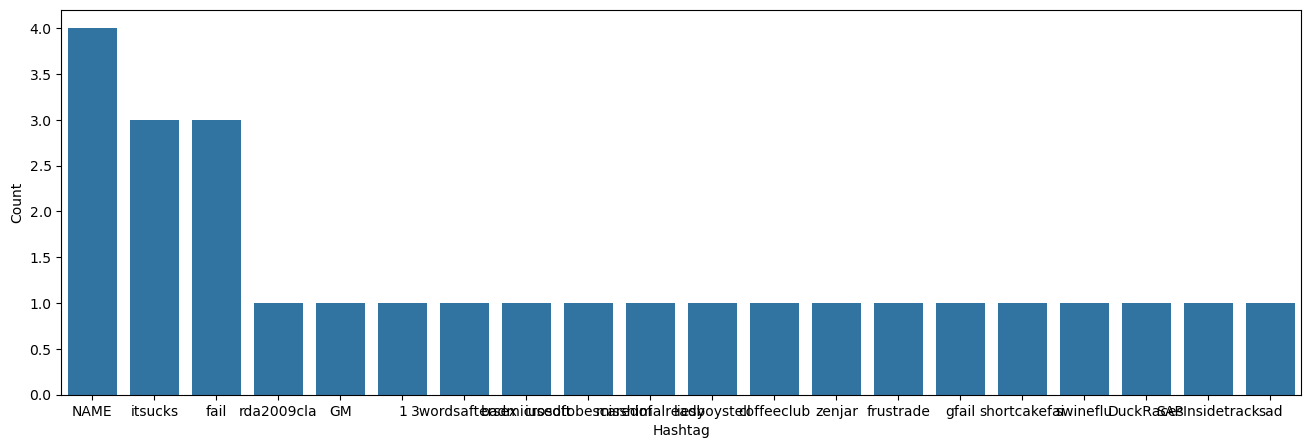

In [35]:
b = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(b.keys()),
                  'Count': list(b.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [37]:

# tokenizing the words present in the training set
tokenized_tweet = train_data['selected_text'].apply(lambda x: x.split())

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train_data['text']), epochs=20)

(2772076, 3899260)

In [38]:
model_w2v.wv.most_similar(positive = "dinner")

[('crispies', 0.7096930146217346),
 ('breakfast', 0.6884973645210266),
 ('cocoa', 0.6741777062416077),
 ('rice', 0.6591793298721313),
 ('Grabbing', 0.6530026197433472),
 ('gd', 0.6529979705810547),
 ('jays', 0.6471992135047913),
 ('all...', 0.644562840461731),
 ('dad.', 0.639629065990448),
 ('yummy', 0.6394771933555603)]

In [39]:
model_w2v.wv.most_similar(positive = "cancer")

[('spilling', 0.7936483025550842),
 ('lung', 0.7934200763702393),
 ('Finishing', 0.7932555079460144),
 ('`tis', 0.7927543520927429),
 ('Meeting', 0.7863390445709229),
 ('YAY!!!', 0.7776142358779907),
 ('load,', 0.7765392065048218),
 ('Matt', 0.7759056091308594),
 ('through.', 0.7757923603057861),
 ('Yea', 0.7674073576927185)]

In [40]:
model_w2v.wv.most_similar(positive = "apple")

[('music!', 0.7229628562927246),
 ('mum`s', 0.721464216709137),
 ('sisters!', 0.7158399820327759),
 ('//', 0.7156320214271545),
 ('romantic', 0.715417742729187),
 ("'A", 0.7131817936897278),
 ('cinnamon', 0.7130376696586609),
 ('Soooo', 0.7073148488998413),
 ('lonley', 0.7009992003440857),
 ('Angels', 0.700234591960907)]

In [41]:
model_w2v.wv.most_similar(negative = "hate")

[('thnks', 0.22309520840644836),
 ('hurts..', 0.17127475142478943),
 ('Awesome,', 0.16755501925945282),
 ('Wishes', 0.16661477088928223),
 ('THANKS!', 0.15475298464298248),
 ('fan!', 0.1383788138628006),
 ('Upset', 0.13794387876987457),
 ('yumm!', 0.13490501046180725),
 ('YAY!!', 0.13305367529392242),
 ('Damnit.', 0.1230938509106636)]

In [42]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
train_corpus = []

for i in range(0, 27481):
  review = re.sub('[^a-zA-Z]', ' ', str(train_data['text'][i]))
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [44]:
test_corpus = []

for i in range(0, 3534):
  review = re.sub('[^a-zA-Z]', ' ', str(tweets_df['text'][i]))
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [47]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(test_corpus).toarray()
y = tweets_df.iloc[:, 1]

print(x.shape)
print(y.shape)

(3534, 2500)
(3534,)


In [48]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)


(3534, 2500)


In [49]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.4, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(2120, 2500)
(1414, 2500)
(2120,)
(1414,)


In [50]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report,precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred, average='weighted'))
print("Precision:", precision_score(y_valid, y_pred, average='weighted'))
print("Recall:", recall_score(y_valid, y_pred, average='weighted'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)
print(classification_report(y_valid, y_pred))

Training Accuracy : 0.9806603773584905
Validation Accuracy : 0.0
F1 score : 0.0
Precision: 0.0
Recall: 0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_

                                                                                                                                                      precision    recall  f1-score   support

                                                                                                                        Awww, that wasn`t very nice.       0.00      0.00      0.00       0.0
                                                                  But  is right: This is like the Cape Breton coal mines but ++. No lessons learned.       0.00      0.00      0.00       1.0
                                                                     Caladesi was definitely a nice peaceful way to spend a Sunday! I got a lil tan!       0.00      0.00      0.00       1.0
                                                                                                                                          I love you       0.00      0.00      0.00       1.0
                                                 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_

In [57]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred, average='weighted'))
print("Precision:", precision_score(y_valid, y_pred, average='weighted'))
print("Recall:", recall_score(y_valid, y_pred, average='weighted'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)
print(classification_report(y_valid, y_pred))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy : 0.9806603773584905
Validation Accuracy : 0.0
F1 score : 0.0
Precision: 0.0
Recall: 0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                                                                                                                                      precision    recall  f1-score   support

                                                                                                                        Awww, that wasn`t very nice.       0.00      0.00      0.00       0.0
                                                                  But  is right: This is like the Cape Breton coal mines but ++. No lessons learned.       0.00      0.00      0.00       1.0
                                                                                                                               But he`s so adorable.       0.00      0.00      0.00       0.0
            

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_

In [52]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred, average='weighted'))
print("Precision:", precision_score(y_valid, y_pred, average='weighted'))
print("Recall:", recall_score(y_valid, y_pred, average='weighted'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)
print(classification_report(y_valid, y_pred))

Training Accuracy : 0.9806603773584905
Validation Accuracy : 0.0
F1 score : 0.0
Precision: 0.0
Recall: 0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_

                                                                                                                                                      precision    recall  f1-score   support

                                                                                      eeek!! Your coming!!!! Im soo excited to see you on Thursday!!       0.00      0.00      0.00       0.0
                                                                                                                        Awww, that wasn`t very nice.       0.00      0.00      0.00       0.0
                                                                  But  is right: This is like the Cape Breton coal mines but ++. No lessons learned.       0.00      0.00      0.00       1.0
                                                                                                                               But he`s so adorable.       0.00      0.00      0.00       0.0
                                                 

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report,precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score
model = SVC()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred, average='weighted'))
print("Precision:", precision_score(y_valid, y_pred, average='weighted'))
print("Recall:", recall_score(y_valid, y_pred, average='weighted'))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)
print(classification_report(y_valid, y_pred))

Training Accuracy : 0.9806603773584905
Validation Accuracy : 0.0
F1 score : 0.0
Precision: 0.0
Recall: 0.0
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                                                                                                                                      precision    recall  f1-score   support

                                                                                                                        Awww, that wasn`t very nice.       0.00      0.00      0.00       0.0
                                                                  But  is right: This is like the Cape Breton coal mines but ++. No lessons learned.       0.00      0.00      0.00       1.0
                                                                                                                               But he`s so adorable.       0.00      0.00      0.00       0.0
            

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_

In [54]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 6.7 MB/s eta 0:00:23
   ---------------------------------------- 1.8/150.0 MB 4.6 MB/s eta 0:00:33
    --------------------------------------- 2.6/150.0 MB 4.2 MB/s eta 0:00:36
    --------------------------------------- 3.1/150.0 MB 4.2 MB/s eta 0:00:36
   - -------------------------------------- 4.2/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 5.0/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 6.0/150.0 MB 4.0 MB/s eta 0:00:36
   - -------------------------------------- 6.8/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 7.6/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 8.4/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 9.2/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 10.0/150.0 MB 4.0 MB/s eta 